# **Loading images using the tf.data.Dataset API**

**loading images using the tf.data.Dataset API is one of the most important innovations that TensorFlow 2.x
Its functional style
interface, as well as its high level of optimization, makes it a better alternative than the
traditional Keras API for large projects, where efciency and performance is a must**

# **IMPORT LIBRARIES**

In [ ]:
import os
import tarfile
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import get_file

# **DEFINE THE URL AND DESTINATION OF THE CINIC-10 DATASET, AN ALTERNATIVE TO THEFAMOUS CIFAR-10 DATASET**

In [ ]:
DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = "cinic10"
FILE_EXTENSION = "tar.gz"
FILE_NAME = ".".join([DATA_NAME, FILE_EXTENSION])

# **DOWNLOAD AND DECOMPRESS THE DATA. by default, it will be stored in ~/keras/dataset/<FILE_NAME>**

In [ ]:
download_file_location = get_file(origin = DATASET_URL, fname = FILE_NAME, extract = False)

# Build the path to the data directory based on the location of the downloaded file
data_directory, _ = download_file_location.rsplit(os.path.sep, maxsplit = 1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])

# Only extract the data if it hasn't been extracted already
if not os.path.exists(data_directory):
  tar = tarfile.open(download_file_location)
  tar.extractall(data_directory)

687544992/687544992 ━━━━━━━━━━━━━━━━━━━━ 46s 0us/step


/tmp/ipython-input-2978837838.py:10: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(data_directory)


# **CREATE A DATASET OF IMAGE PATH USING A GLOB-LIKE PATTERN**

In [ ]:
data_pattern = os.path.sep.join([data_directory, "*/*/*.png"])
image_dataset = tf.data.Dataset.list_files(data_pattern)

# **TAKE A SIMPLE PATH FROM THE DATASET AND USE IT TO READ THE CORRESPONDING IMAGE**

In [ ]:
for file_path in image_dataset.take(1):
  sample_path = file_path.numpy()
sample_image = tf.io.read_file(sample_path)

# **Even though the image is now in memory, we must convert it into format a neural network can work with. For this, we must decode it from its PNG format into a Numpy array, as follow**

In [ ]:
sample_image = tf.image.decode_png(sample_image, channels = 3)
sample_image = sample_image.numpy()

# **DISPLAY THE IMAGE USING MATPLOTLIB**

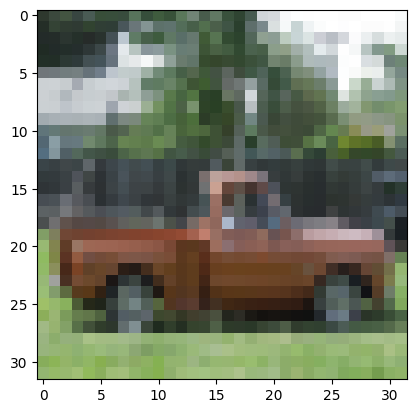

In [ ]:
plt.imshow(sample_image / 255.0)

# Take the first 10 elements of image_dataset, decode and normalize them, and then display them using matplotlib

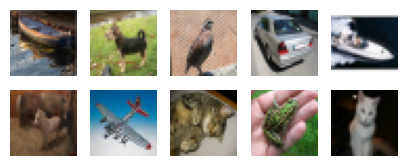

In [ ]:
plt.figure(figsize = (5, 5))
for index, image_path in enumerate(image_dataset.take(10), start = 1):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image,  channels = 3)
  image = tf.image.convert_image_dtype(image,np.float32)

  ax = plt.subplot(5, 5, index)
  plt.imshow(image)
  plt.axis("off")
plt.show()
plt.close()
